在处理一组数据时，通常首先要做的是了解变量是如何分布的。
这一章将简要介绍seborn中用于检查单变量和双变量分布的一些工具。

In [3]:
%matplotlib inline
import numpy as np
import pandas as pd
from scipy import stats, integrate
import matplotlib.pyplot as plt

import seaborn as sns
sns.set(color_codes=True)

np.random.seed(sum(map(ord, "distributions")))

## 单变量分布

最方便的方式是快速查看单变量分布无疑是使用distplot()函数。默认情况下，这将绘制一个直方图，并拟合出核密度估计(KDE)。

c:\users\ause\desktop\python2101\2101\env\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

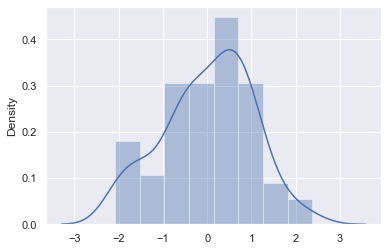

In [12]:
# data hist plot
x = np.random.normal(size=100)
# 画的是一个直方图,并且自动把kde画出来了.
sns.distplot(x)

<AxesSubplot:ylabel='Density'>

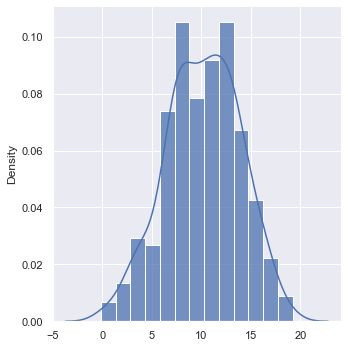

In [7]:
x = np.random.normal(loc=10, scale=4, size=300)
# 画的是一个直方图,并且自动把kde画出来了.
sns.displot(x, kind='kde')
sns.histplot(x, stat='density')

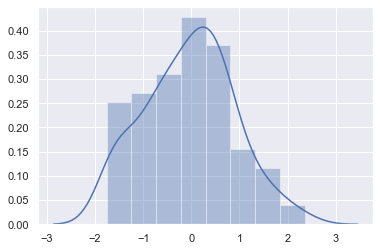

In [4]:
x = np.random.randn(100)
sns.distplot(x)

d:\2004\.venv\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
d:\2004\.venv\lib\site-packages\seaborn\distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:>

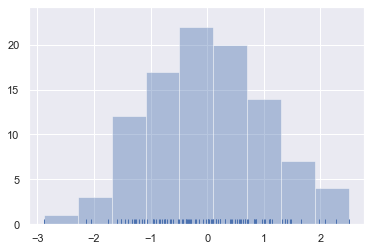

In [9]:
sns.distplot(x,kde=False, rug=True) # kde=False,表示不画kde, rug表示画地毯图

d:\2004\.venv\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
d:\2004\.venv\lib\site-packages\seaborn\distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:>

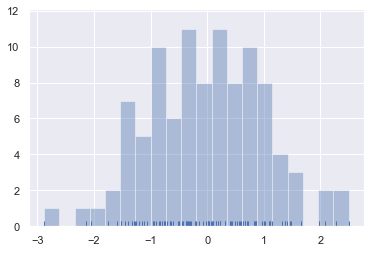

In [10]:
# 和matplotlib一样,bins控制柱子数量 , 或许能够反映数据的特征.
sns.distplot(x,kde=False, rug=True, bins=20)

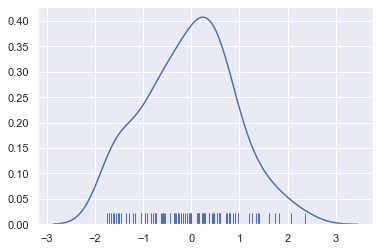

In [7]:
# 也可以只画核密度图(kernel density estimation)
sns.distplot(x, hist=False, kde=True, rug=True)

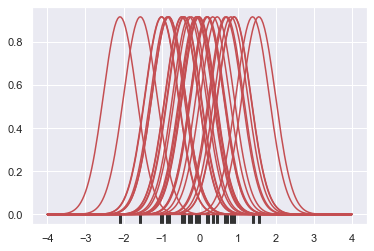

In [8]:
x = np.random.normal(0, 1, size=30)
bandwidth = 1.06 * x.std() * x.size ** (-1 / 5.)
support = np.linspace(-4, 4, 200)

kernels = []
for x_i in x:
    # pdf概率密度函数
    kernel = stats.norm(x_i, bandwidth).pdf(support)
    kernels.append(kernel)
    plt.plot(support, kernel, color="r")

sns.rugplot(x, color=".2", linewidth=3);

In [12]:
diamonds = sns.load_dataset("diamonds")

<AxesSubplot:ylabel='Density'>

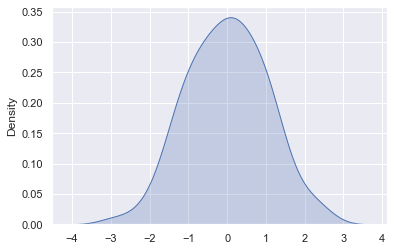

In [11]:
# 直接画kde图可以直接使用kdeplot
sns.kdeplot(x, shade=True)


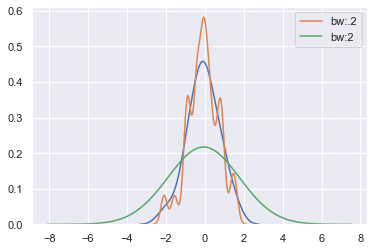

In [10]:
# KDE的带宽bandwidth（bw）参数控制估计对数据的拟合程度，与直方图中的bin(数据切分数量参数)大小非常相似。
#它对应于我们上面绘制的内核的宽度。 默认中会尝试使用通用引用规则猜测一个适合的值，但尝试更大或更小的值可能会有所帮助
sns.kdeplot(x)
sns.kdeplot(x, bw=.2, label='bw:.2')
sns.kdeplot(x, bw=2, label='bw:2')
plt.legend()

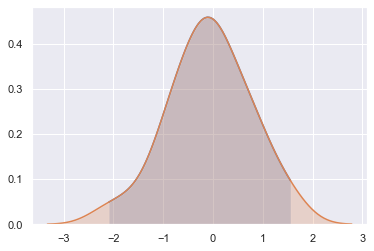

In [11]:
sns.kdeplot(x, shade=True, cut=0)
sns.kdeplot(x, shade=True)

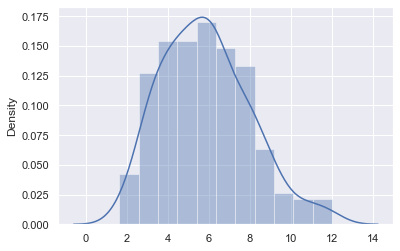

In [15]:
x = np.random.gamma(6, size=200)
sns.distplot(x, kde=True, );

d:\2004\.venv\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


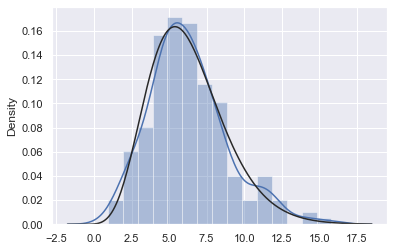

In [16]:
# fit=stats.gamma
x = np.random.gamma(6, size=200)
sns.distplot(x, kde=True, fit=stats.gamma);

## 控制双变量分布

joinplot 用来显示双变量的关系.

In [20]:
# 创建多变量的正态分布
mean = [0, 1]
# 协方差
cov = [[1, .5], [.5, 1]]
data = np.random.multivariate_normal(mean, cov, 200)
df = pd.DataFrame(data, columns=['x', 'y'])
df

,x,y
0,-0.663582,-0.319203
1,-1.191682,-0.207802
2,1.194915,1.942023
3,-0.676778,1.281269
4,0.227862,-0.232295
...,...,...
195,0.020652,1.829235
196,-0.569182,1.245291
197,2.988876,3.770524
198,-1.091175,0.892617


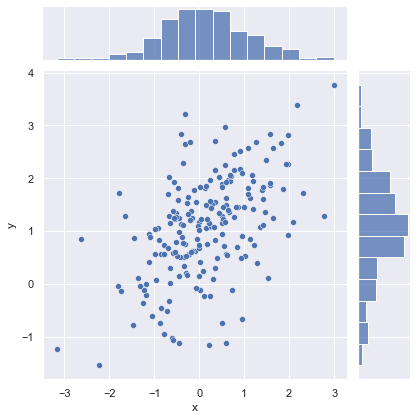

In [21]:
sns.jointplot(x='x', y='y', data=df)

In [22]:
iris = sns.load_dataset('iris')

In [23]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


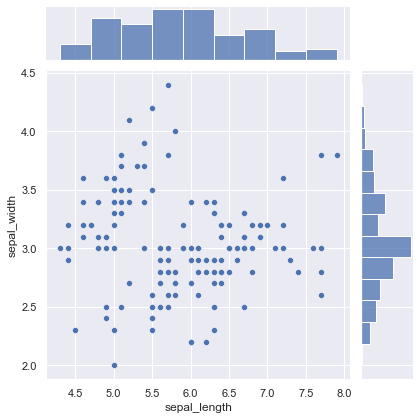

In [24]:
sns.jointplot(x='sepal_length', y='sepal_width', data=iris)

In [15]:
data[:,0].mean()
data[:,0].std()

0.9734734326530495

In [16]:
data[:,1].mean()
data[:,1].std()

1.0233429853179117

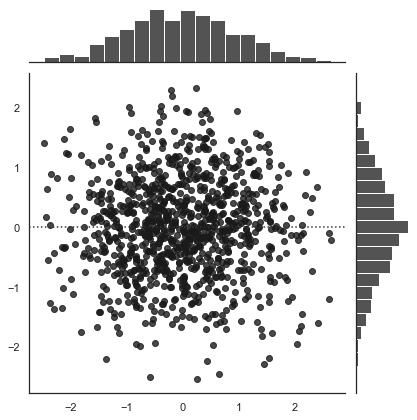

In [25]:
x, y = np.random.multivariate_normal(mean, cov, 1000).T
with sns.axes_style("white"):
    # jointplot默认画散点图, 通过kind可以修改成其他图形.
    sns.jointplot(x=x, y=y, kind="resid", color="k")

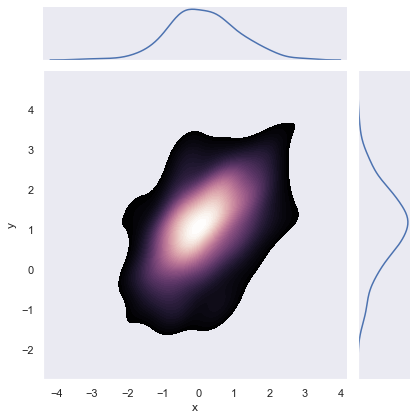

In [31]:
# 使用核密度估计也可以
sns.set_style('dark')
cmap = sns.cubehelix_palette(as_cmap=True, dark=0, light=1, reverse=True)
sns.jointplot(x="x", y="y", data=df, kind="kde", cmap=cmap,n_levels=60, shade=True)

可以使用kdeplot()函数绘制二维核密度图。这样可以将这种绘图绘制到一个特定的（可能已经存在的）matplotlib轴上，而jointplot()函数只能管理自己

In [21]:
df

,x,y
0,-0.337495,3.982726
1,0.744509,1.148785
2,-0.178456,0.135073
3,0.326349,0.582835
4,0.329835,0.894002
5,0.527435,0.069527
6,-1.215976,0.283421
7,-0.711549,2.283325
8,-0.763538,1.494089
9,-0.241653,2.085921


d:\2004\.venv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
d:\2004\.venv\lib\site-packages\seaborn\distributions.py:2064: FutureWarning: Using `vertical=True` to control the orientation of the plot  is deprecated. Instead, assign the data directly to `y`. 
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='x', ylabel='y'>

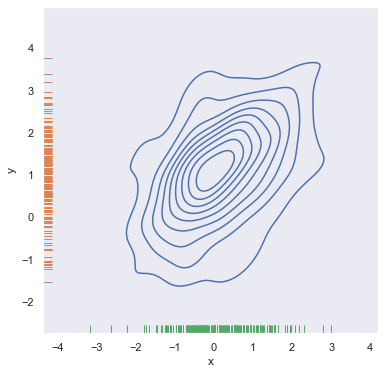

In [32]:
f, ax = plt.subplots(figsize=(6,6))
sns.kdeplot(df.x, df.y, ax=ax)
sns.rugplot(df.x, color='g', ax=ax)
sns.rugplot(df.y, vertical=True, ax=ax)

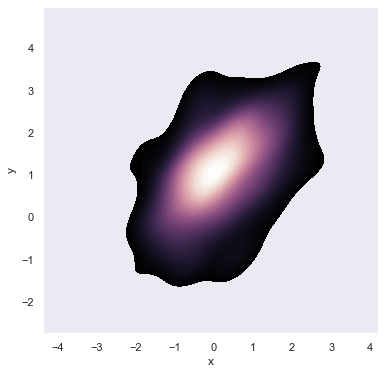

In [34]:
# 如果是希望更连续地显示双变量密度，可以简单地增加n_levels参数增加轮廓级数
f, ax = plt.subplots(figsize=(6, 6))
cmap = sns.cubehelix_palette(as_cmap=True, dark=0, light=1, reverse=True)
sns.kdeplot(x=df.x, y=df.y, cmap=cmap, n_levels=60, shade=True);

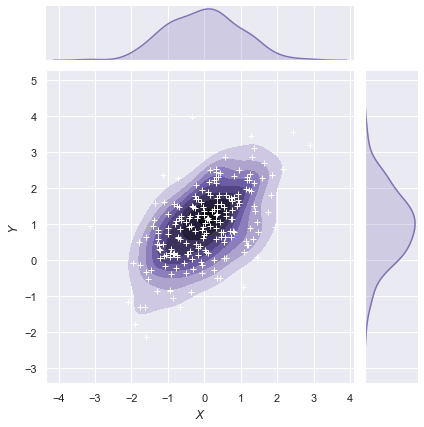

In [25]:
# jointplot()函数使用JointGrid来管理。为了获得更多的灵活性，您可能需要直接使用JointGrid绘制图形。jointplot()在绘制后返回JointGrid对象，您可以使用它来添加更多图层或调整可视化的其他方面：
g = sns.jointplot(x="x", y="y", data=df, kind="kde", color="m")
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$X$", "$Y$");

### 呈现数据集中成对的关系

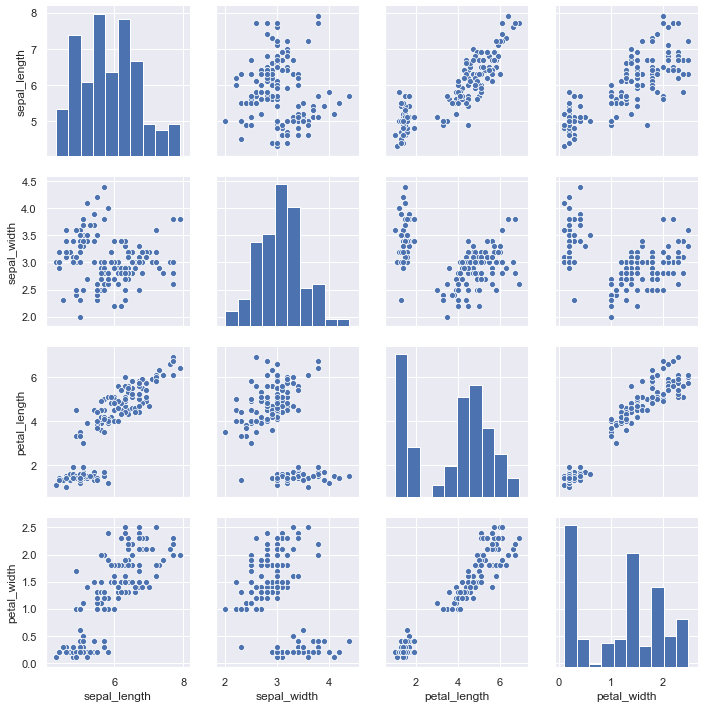

In [7]:
# 其实就是相当于画一个散点图矩阵,查看数据集中两两之间的关系.
iris = sns.load_dataset('iris')
sns.pairplot(iris)

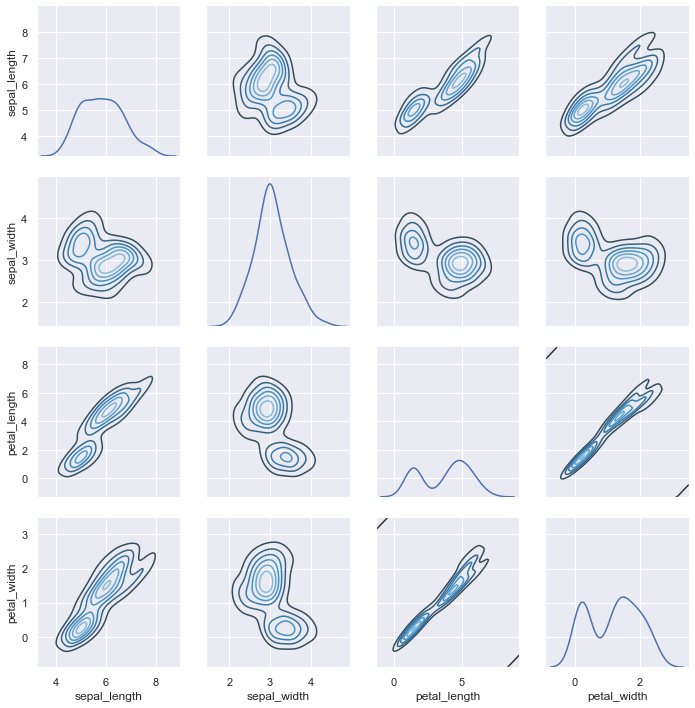

In [30]:
# 对于jointplot()和JointGrid之间的关系，pairplot()函数是建立在一个PairGrid对象上的，可以直接使用它来获得更大的灵活性
# 改成了等高线图和对角线kde图.
g = sns.PairGrid(iris)
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.kdeplot, cmap="Blues_d", n_levels=6);